In [1]:
train = pd.read_json('./raw_data/train.json')
val = pd.read_json('./raw_data/val.json')
test = pd.read_json('./raw_data/test.json')

In [2]:
song_meta = pd.read_json('./raw_data/song_meta.json')

In [3]:
genre = pd.read_json('./raw_data/genre_gn_all.json', typ='series')

In [4]:
df = pd.concat([train, val, test])

# playlist에 언급된 unique한 노래들 추출

In [5]:
df_songs = df['songs'].apply(lambda x : [str(i) for i in x])
df_songs = df['songs'].reset_index(drop=True)
unique_song_list = np.concatenate(df_songs)
unique_song_list = list(set(unique_song_list))
unique_song_list = [int(i) for i in unique_song_list]
unique_song_list[:5]

[0, 3, 4, 5, 6]

In [6]:
from collections import Counter

In [7]:
## while 로 안채워지는 애들 채워주기, 
## 곡 몇곡 없고 list도 하나밖에 없는 애들은 리스트를 채우기 힘듦

In [ ]:
from tqdm import tqdm
from collections import OrderedDict
df_result = pd.DataFrame()
for k in tqdm(unique_song_list):
    result = df_songs[df_songs.apply(lambda x : True if k in x else False)]
    ls = [i[0] for i in Counter(np.concatenate(result.values)).most_common() if i[0] != k][:101]
    num = 0
    while len(ls) < 100 or len(ls) < num:
        j = ls[num]
        ls_new = [i[0] for i in Counter(np.concatenate(df_songs[df_songs.apply(lambda x : True if j in x else False)].values)).most_common() if i[0] != j][:101]
        ls += ls_new
        num += 1
    ls.insert(0,k)
    df_result = df_result.append([pd.DataFrame(list(dict.fromkeys(ls))[:101]).T])

  0%|          | 10/649091 [00:08<186:56:26,  1.04s/it]

In [ ]:
df_result

# 최대한 채우려 하지 않는 모델

In [7]:
from tqdm import tqdm
df_result = pd.DataFrame()
for k in tqdm(unique_song_list[:100]):
    ls = [i[0] for i in Counter(np.concatenate(df_songs[df_songs.apply(lambda x : True if k in x else False)].values)).most_common() if i[0] != k][:101]
    ls.insert(0,k)
    df_result = df_result.append([pd.DataFrame(ls[:101]).T])

100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


In [9]:
import missingno as msno

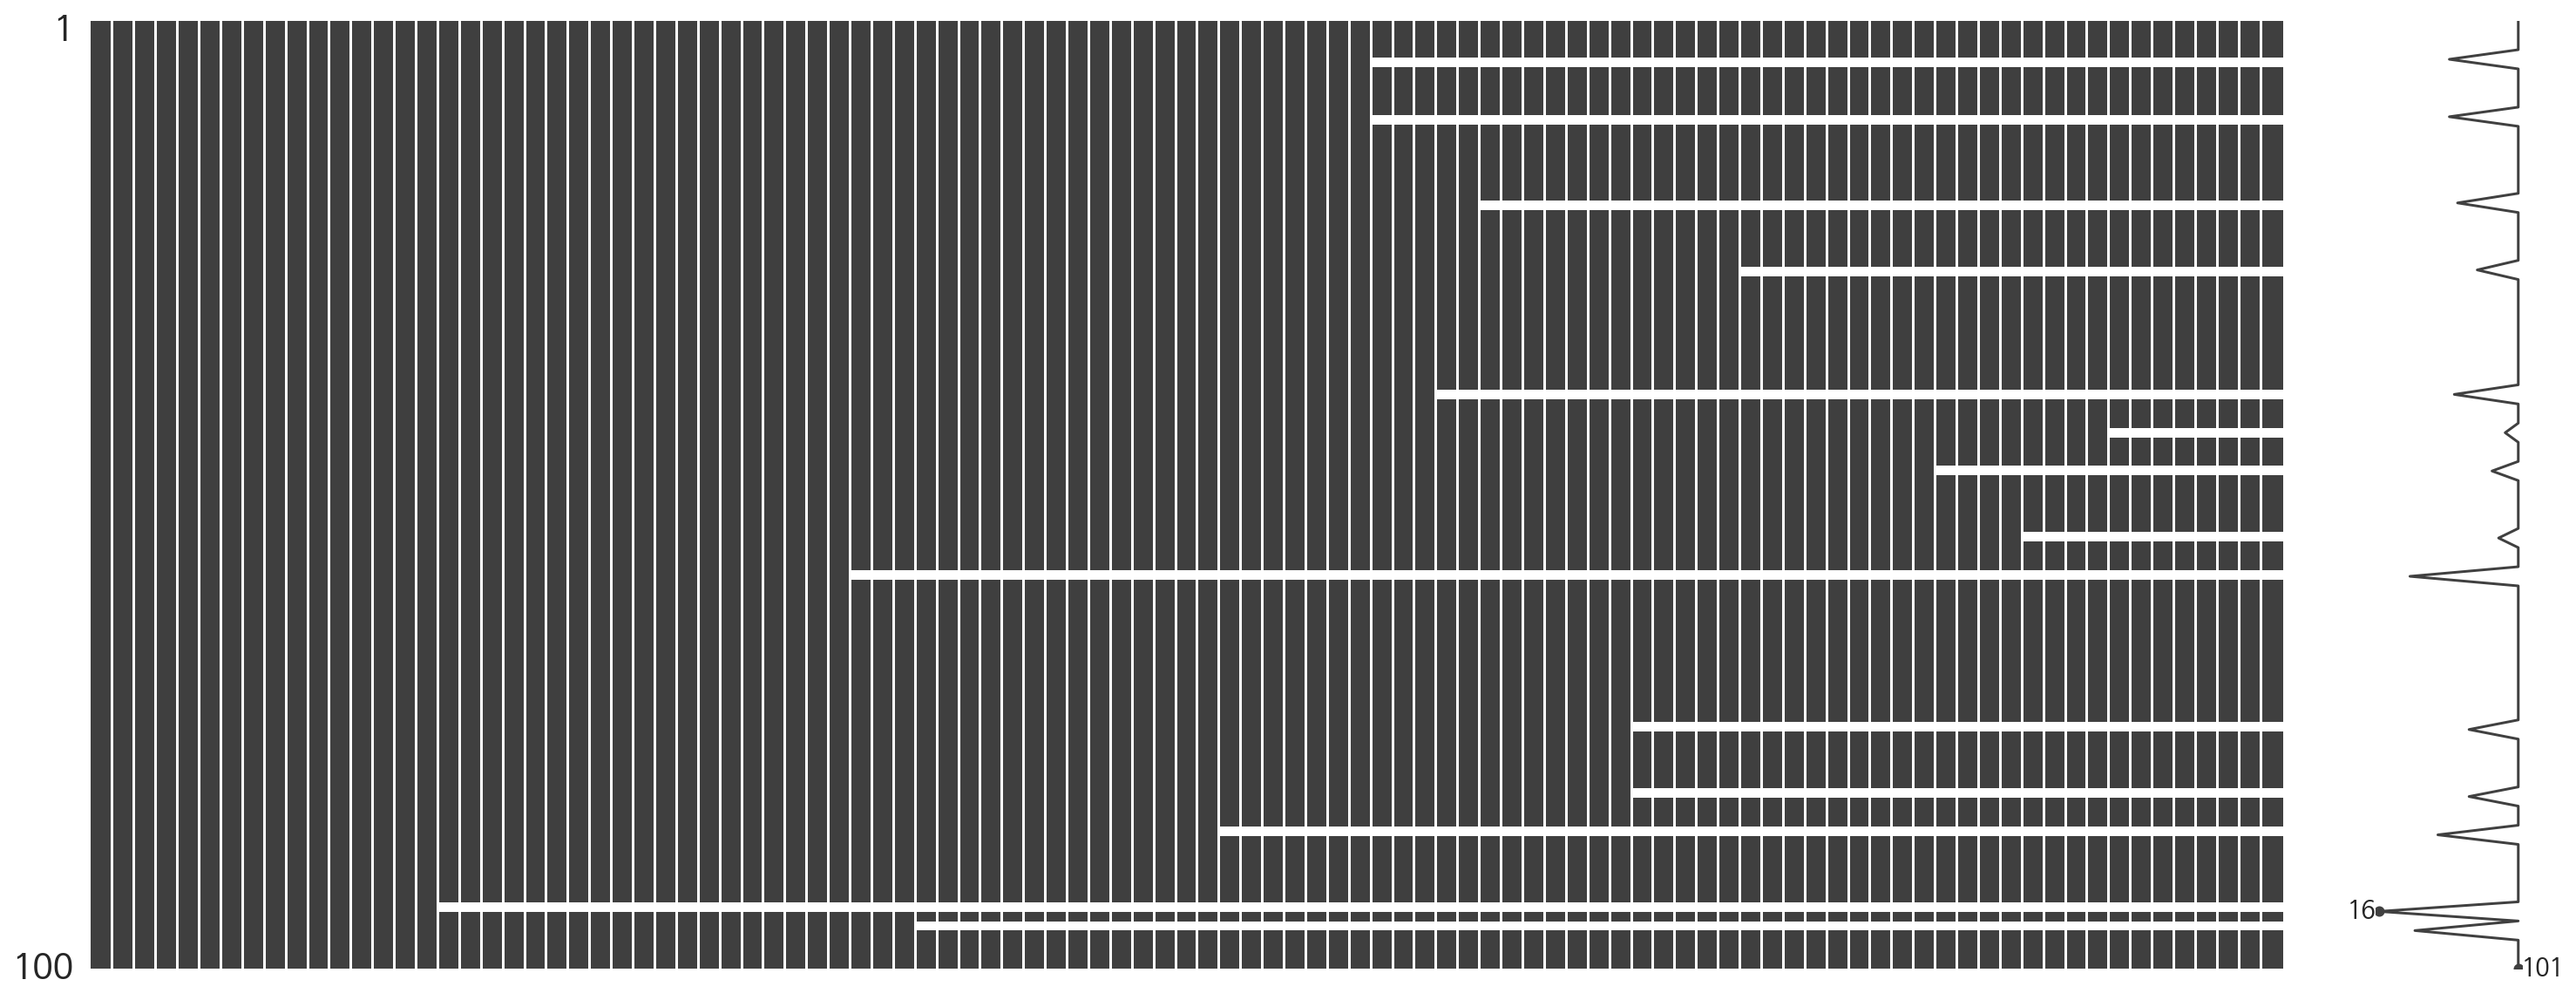

In [10]:
msno.matrix(df_result)

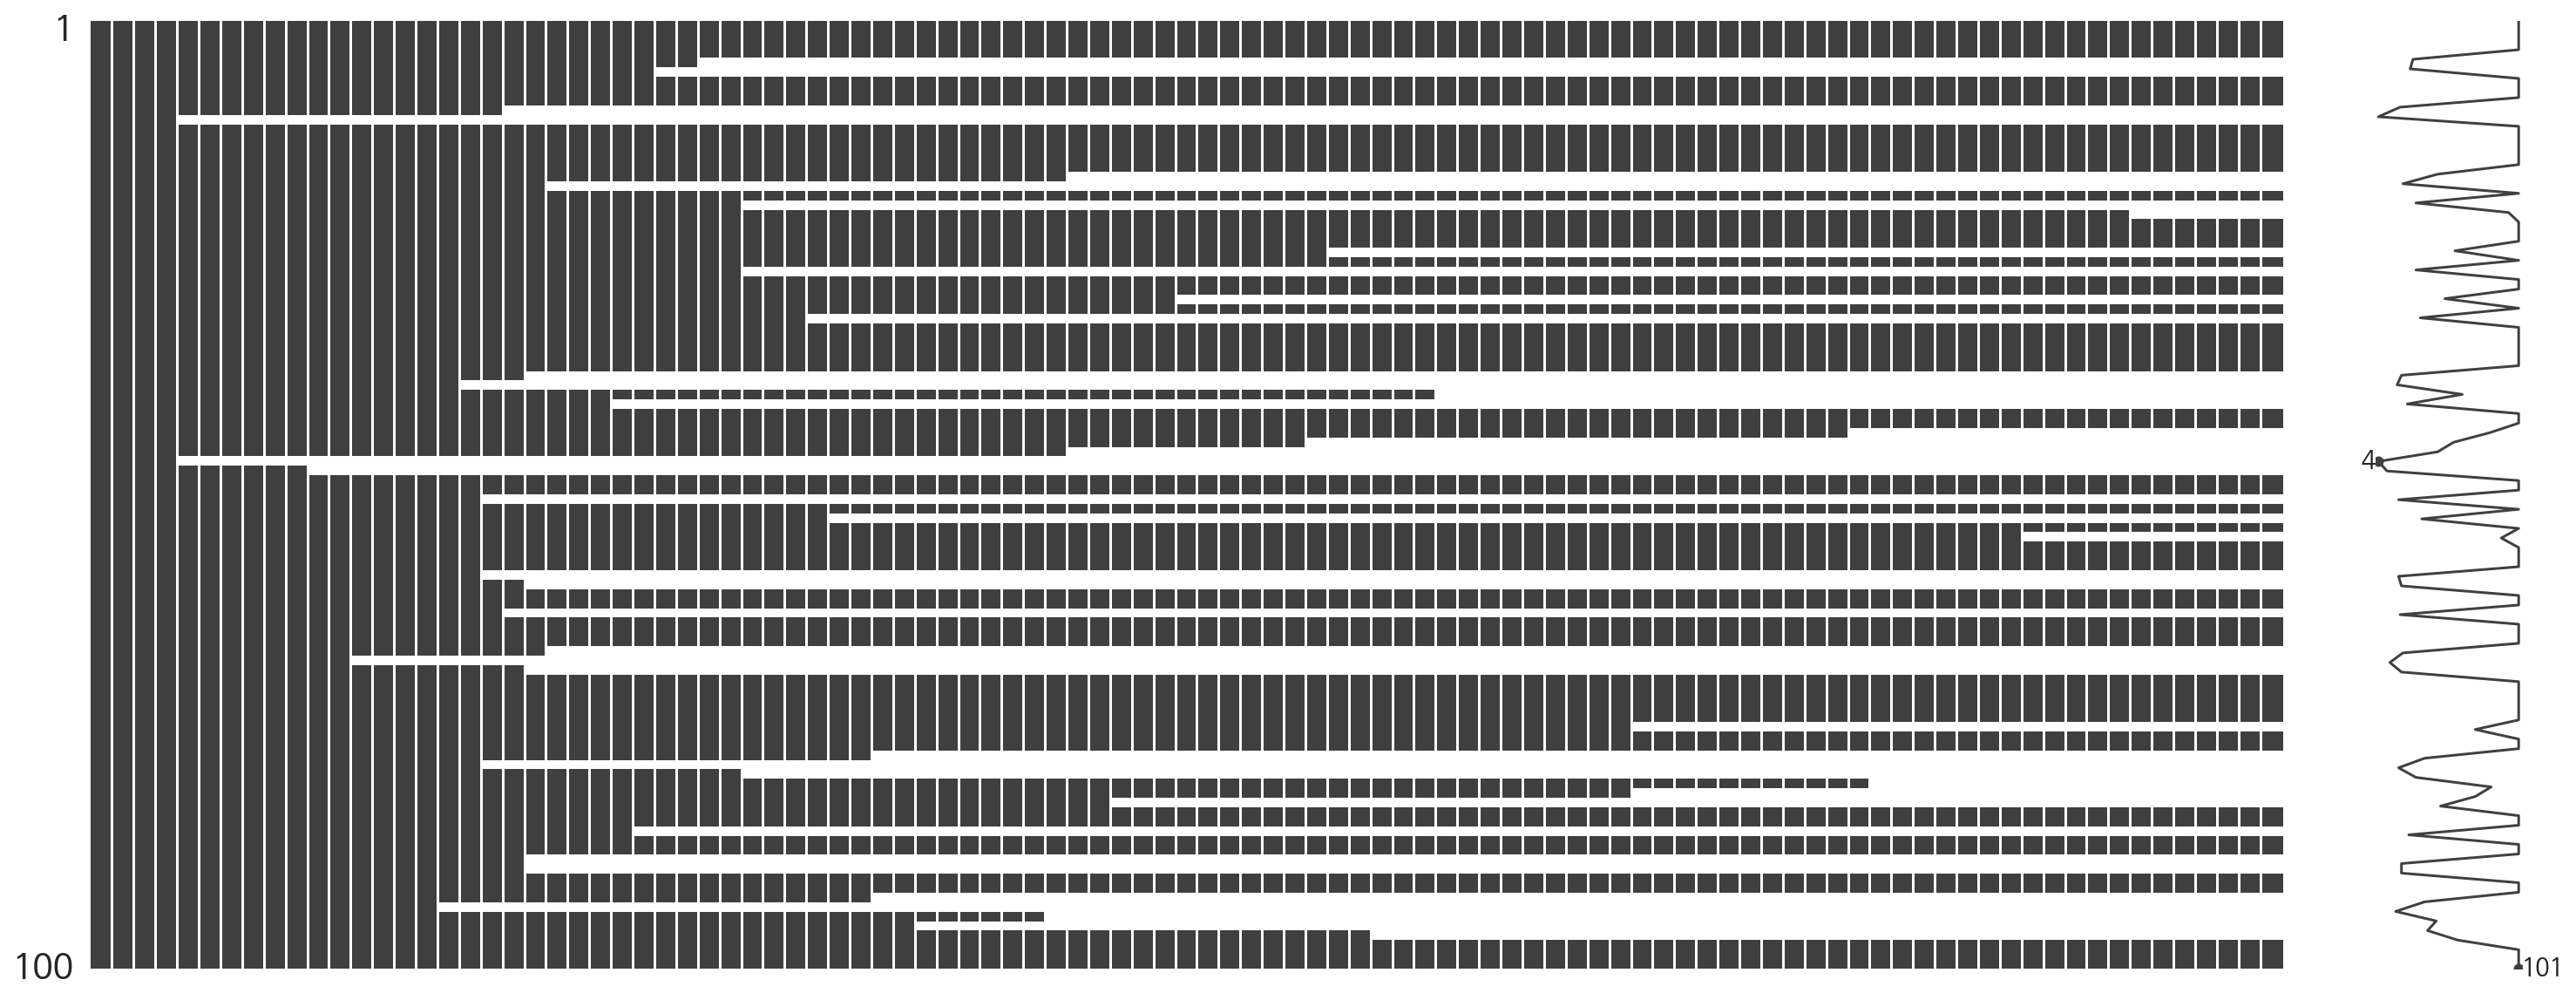

In [12]:
msno.matrix(df_result)

In [138]:
result = df_songs[df_songs.apply(lambda x : True if 6 in x else False)]
ls = [i[0] for i in Counter(np.concatenate(result.values)).most_common() if i[0] != 6]
ls

[269044,
 121919,
 574342,
 500940,
 63432,
 430751,
 167319,
 547576,
 519368,
 541628,
 287591,
 341133,
 309296,
 355463,
 147824,
 251268,
 50099,
 487714,
 298578,
 354599,
 134269,
 391092,
 673709,
 572664,
 87779,
 321193,
 321118]

In [137]:
len(ls)

27

In [122]:
ls

[269044,
 121919,
 574342,
 500940,
 63432,
 430751,
 167319,
 547576,
 519368,
 541628,
 287591,
 341133,
 309296,
 355463,
 6,
 147824,
 251268,
 50099,
 487714,
 298578,
 354599,
 134269,
 391092,
 673709,
 572664,
 87779,
 321193,
 321118]

In [104]:
len(set(ls))

28

In [94]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0,36457,594592,0,572238,243286.0,452316.0,399637.0,169627.0,615644.0,...,278629.0,697349.0,216485.0,329922.0,70624.0,383918.0,521272.0,560234.0,216726.0,629908.0
0,3,3,1221,706518,29783,26741.0,565161.0,635987.0,581086.0,381583.0,...,349306.0,383011.0,76690.0,43627.0,270009.0,362350.0,311195.0,24428.0,481642.0,13828.0
0,4,146148,687500,408092,94525,493751.0,228614.0,4.0,436645.0,609521.0,...,563313.0,338931.0,597704.0,339501.0,254203.0,435095.0,147606.0,91349.0,278201.0,47710.0
0,5,5,64762,10798,117877,230386.0,588496.0,186366.0,468818.0,614756.0,...,90673.0,673904.0,560349.0,488307.0,692012.0,264517.0,624585.0,368135.0,434304.0,482146.0
0,6,269044,121919,574342,500940,63432.0,430751.0,167319.0,547576.0,519368.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1091,170839,46579,345979,222262,562726.0,139239.0,227515.0,103242.0,29456.0,...,600973.0,26841.0,65296.0,254920.0,421494.0,3051.0,566315.0,81583.0,693118.0,2636.0
0,1092,1092,412975,271431,53522,356259.0,411444.0,139756.0,60877.0,330768.0,...,207709.0,600757.0,354592.0,107945.0,475525.0,351537.0,573519.0,294720.0,315997.0,22527.0
0,1093,335683,689301,554137,270156,276151.0,357594.0,39144.0,159139.0,52679.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1094,1094,629971,146032,395091,479956.0,332151.0,96859.0,158957.0,81440.0,...,371720.0,299387.0,260612.0,411779.0,195080.0,400105.0,200132.0,256899.0,95545.0,12783.0


In [43]:
import missingno as msno

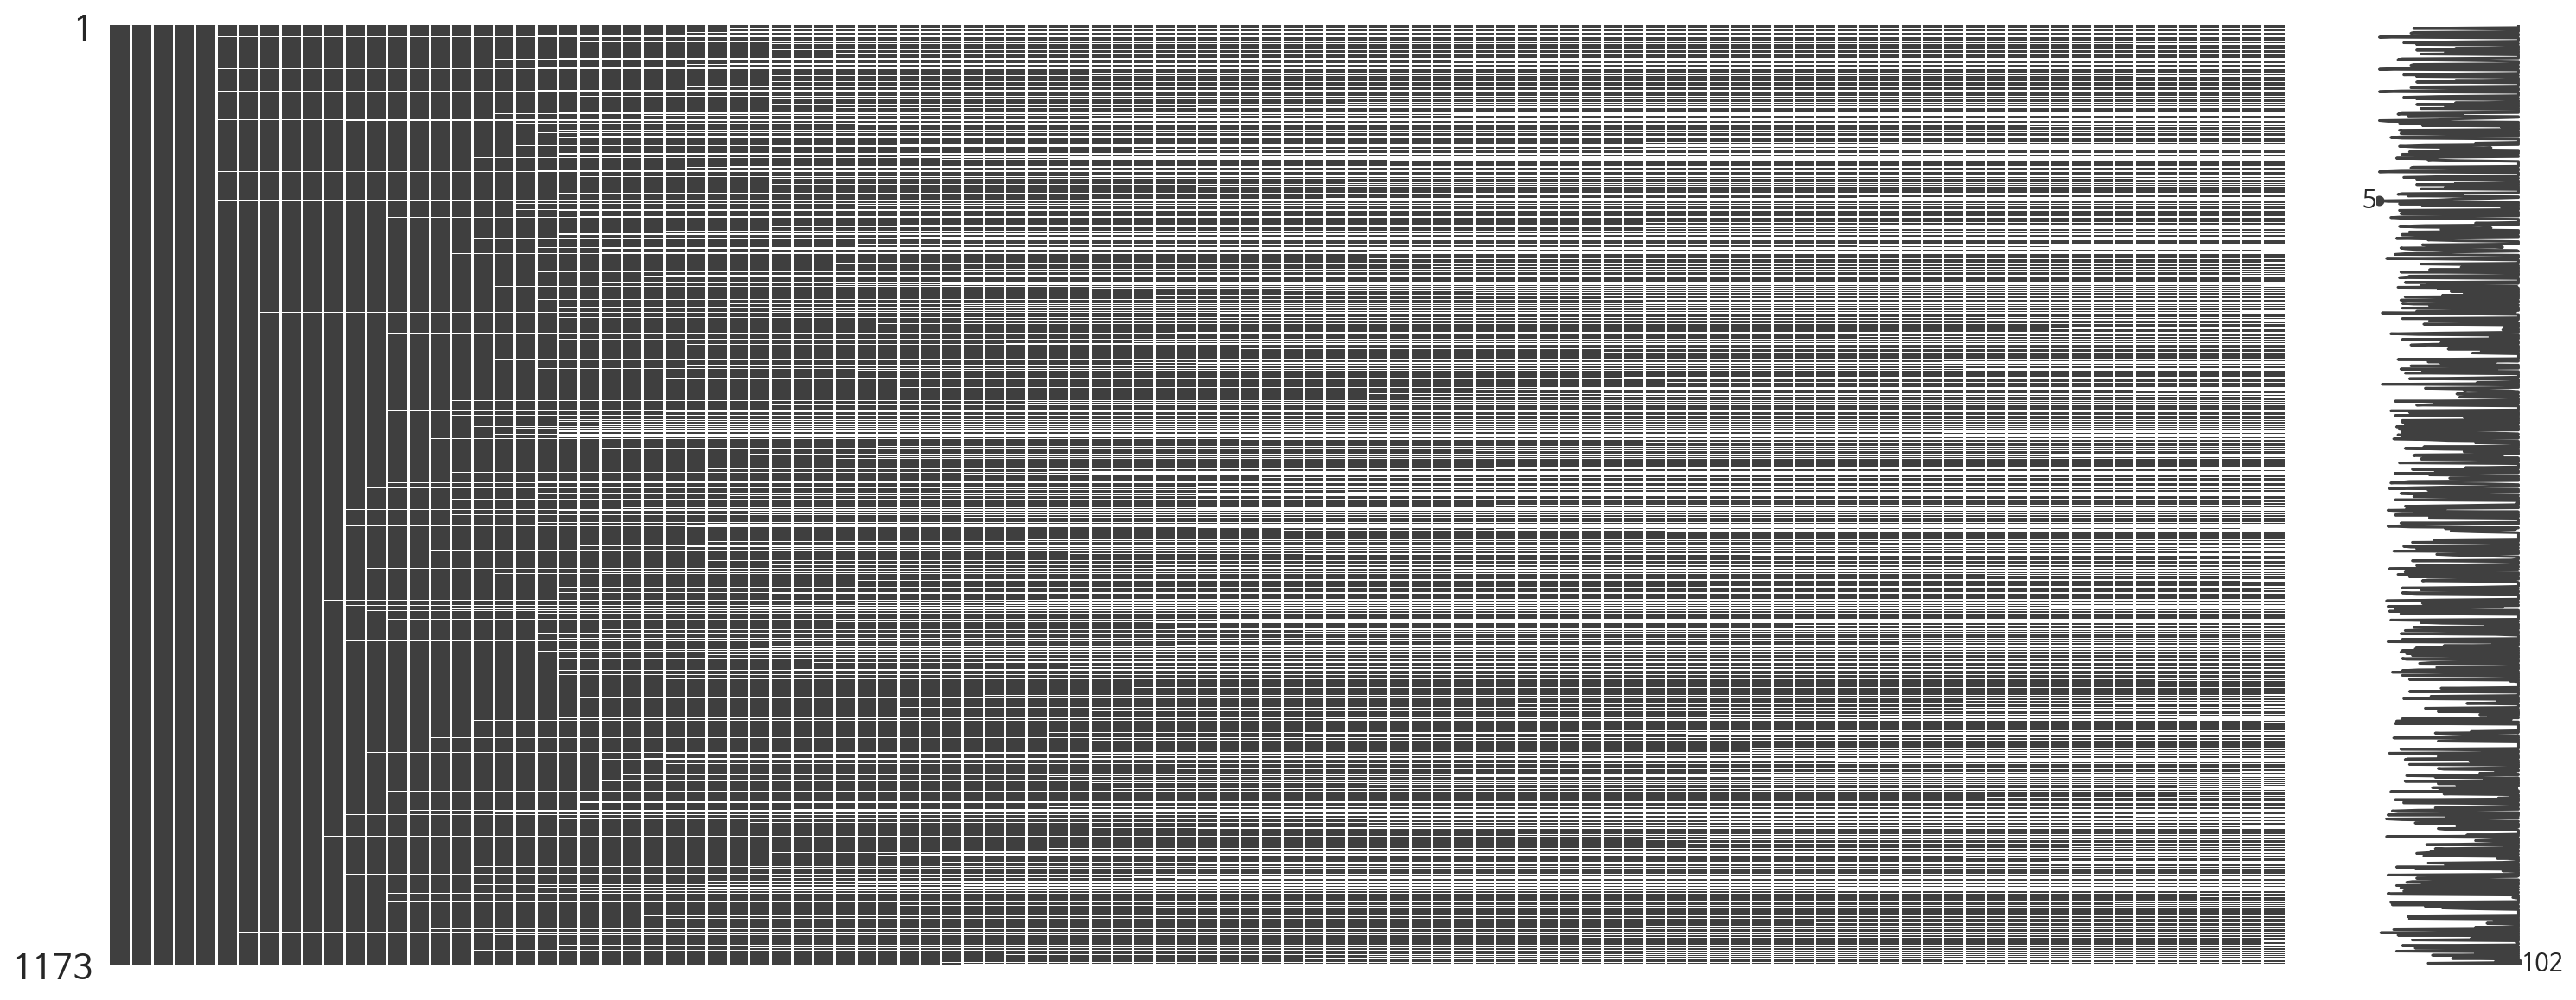

In [44]:
msno.matrix(df_result)

In [35]:
len(unique_song_list)

649091

In [26]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416
0,548636,548636,542127,384227,76888,363277,72222,459256,252802,484934,...,346379,108003,90821,236393,518001,473639,245277,439301,119795,643416


In [11]:
result = df_songs[df_songs.apply(lambda x : True if 0 in x else False)]
a =  np.concatenate(result.values)
ls = [i[0] for i in Counter(a).most_common()][:101]
ls.insert(0,k)
pd.DataFrame(ls).T

[36457,
 594592,
 0,
 572238,
 243286,
 452316,
 399637,
 169627,
 615644,
 327113,
 285282,
 563692,
 706549,
 150375,
 706763,
 228514,
 638927,
 86258,
 313056,
 221362,
 258600,
 409094,
 474364,
 490266,
 446119,
 471233,
 1373,
 675136,
 228516,
 480049,
 419499,
 245111,
 337696,
 94204,
 676544,
 422713,
 595292,
 80209,
 277869,
 272379,
 541580,
 673754,
 560095,
 394358,
 150446,
 267896,
 668895,
 139188,
 634412,
 236828,
 164556,
 279514,
 338632,
 319820,
 205394,
 470567,
 85828,
 599173,
 392104,
 140011,
 352011,
 127216,
 415619,
 397516,
 561135,
 328829,
 478065,
 180787,
 400123,
 463430,
 483547,
 549912,
 433469,
 188261,
 322783,
 29105,
 664644,
 540699,
 653528,
 566560,
 7993,
 431595,
 307463,
 409245,
 535337,
 176196,
 674278,
 13615,
 640456,
 294213,
 614659,
 278629,
 697349,
 216485,
 329922,
 70624,
 383918,
 521272,
 560234,
 216726,
 629908]

In [101]:
ls = [i[0] for i in Counter(a).most_common()][:101]
ls.insert(0,k)

[371498,
 224139,
 564916,
 231154,
 308189,
 430005,
 25703,
 284179,
 81605,
 684625,
 405687,
 158153,
 97702,
 8944,
 420005,
 664555,
 55035,
 175293,
 311997,
 195,
 402984,
 33244,
 379841,
 690251,
 701202,
 470374,
 89620,
 310375,
 270593,
 655254,
 161208,
 59211,
 294435,
 360131,
 146266,
 127681,
 502122,
 355062,
 106479,
 54875,
 540123,
 464542,
 424140,
 106214,
 234852,
 61595,
 444578,
 501335,
 477725,
 255453,
 366243,
 340108,
 30028,
 86875,
 568089,
 664191,
 63146,
 343677,
 583375,
 250477,
 383888,
 592854,
 672639,
 420730,
 644788,
 436057,
 381862,
 264162,
 554519,
 154532,
 82473,
 8742,
 255158,
 225228,
 643315,
 324208,
 210512,
 44220,
 513187,
 627571,
 678202,
 528265,
 644913,
 461524,
 393277,
 495997,
 483883,
 553610,
 144617,
 84285,
 327354,
 74403,
 141998,
 667123,
 630552,
 345004,
 252859,
 46862,
 73357,
 532128,
 348919]

In [87]:
test

In [ ]:
data = data.append(pd.DataFrame({'A': i}, index=[0]), ignore_index=True)

In [38]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,50104,325172,295384,563620,320209,525514,129701,383374,562083,297861,...,259807,404134,42523,442397,300648,430957,528306,64152,424603,528486


In [29]:
ls = []
result = df_songs[df_songs.apply(lambda x : True if i in x else False)]
a = result.values.sum()
df_result = pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T
df_result.append(df_result)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,50104,325172,295384,563620,320209,525514,129701,383374,562083,297861,...,259807,404134,42523,442397,300648,430957,528306,64152,424603,528486
0,50104,325172,295384,563620,320209,525514,129701,383374,562083,297861,...,259807,404134,42523,442397,300648,430957,528306,64152,424603,528486


In [ ]:
pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T

In [228]:
Counter(a)

Counter({269044: 1,
         121919: 1,
         574342: 1,
         500940: 1,
         63432: 1,
         430751: 1,
         167319: 1,
         547576: 1,
         519368: 1,
         541628: 1,
         287591: 1,
         341133: 1,
         309296: 1,
         355463: 1,
         6: 1,
         147824: 1,
         251268: 1,
         50099: 1,
         487714: 1,
         298578: 1,
         354599: 1,
         134269: 1,
         391092: 1,
         673709: 1,
         572664: 1,
         87779: 1,
         321193: 1,
         321118: 1})

In [ ]:
# playlist에 언급된 unique한 노래들 추출

result = df[df['songs'].apply(lambda x : True if 6 in x else False)]
a = result.songs.values.sum()
df = pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T
df.concat([df])

pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T

Counter(a)

In [1]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [4]:
X.shape

(6, 100)

In [6]:
X[2:]

array([[2, 4, 4, 0, 3, 3, 0, 3, 1, 0, 2, 2, 2, 0, 2, 1, 4, 0, 4, 4, 1, 3,
        1, 4, 1, 2, 1, 0, 0, 2, 4, 1, 0, 0, 3, 1, 0, 4, 3, 2, 3, 4, 4, 3,
        0, 0, 0, 4, 1, 4, 1, 2, 2, 4, 3, 4, 4, 0, 3, 2, 4, 3, 4, 2, 3, 0,
        2, 1, 3, 2, 0, 1, 4, 1, 3, 3, 1, 2, 0, 2, 4, 0, 2, 4, 3, 4, 3, 0,
        4, 2, 2, 4, 1, 2, 1, 1, 1, 0, 4, 4],
       [2, 2, 3, 1, 4, 0, 0, 3, 2, 4, 1, 3, 1, 1, 2, 4, 0, 3, 0, 4, 2, 3,
        1, 1, 4, 4, 0, 2, 1, 3, 0, 1, 0, 2, 2, 4, 3, 2, 2, 2, 0, 2, 0, 4,
        1, 0, 2, 3, 0, 4, 3, 3, 3, 0, 3, 1, 2, 0, 1, 4, 2, 3, 4, 4, 2, 1,
        2, 0, 3, 3, 2, 0, 0, 0, 0, 2, 4, 0, 4, 1, 2, 1, 2, 4, 1, 3, 1, 1,
        2, 4, 1, 0, 2, 1, 2, 0, 0, 3, 4, 1],
       [0, 4, 0, 3, 2, 4, 3, 2, 4, 2, 4, 0, 0, 4, 2, 2, 4, 2, 3, 0, 0, 4,
        3, 4, 3, 3, 4, 0, 3, 1, 4, 4, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 3, 0,
        0, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 0, 4, 0, 2, 4, 4, 2, 0, 3, 2,
        4, 0, 4, 2, 3, 4, 2, 4, 1, 3, 4, 3, 0, 3, 0, 4, 3, 0, 3, 1, 4, 4,
        2, 2, 4, 2, 1,

In [7]:
print(clf.predict(X[2:]))

[3 4 5 6]
